In [24]:
import pandas as pd
import geopandas as gpd

import seaborn as sns


import matplotlib.pyplot as plt
import numpy as np

Index(['FL_DATE', 'OP_CARRIER', 'OP_CARRIER_FL_NUM', 'ORIGIN', 'DEST',
       'CRS_DEP_TIME', 'DEP_TIME', 'DEP_DELAY', 'TAXI_OUT', 'WHEELS_OFF',
       'WHEELS_ON', 'TAXI_IN', 'CRS_ARR_TIME', 'ARR_TIME', 'ARR_DELAY',
       'CANCELLED', 'CANCELLATION_CODE', 'DIVERTED', 'CRS_ELAPSED_TIME',
       'ACTUAL_ELAPSED_TIME', 'AIR_TIME', 'DISTANCE', 'CARRIER_DELAY',
       'WEATHER_DELAY', 'NAS_DELAY', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY',
       'Unnamed: 27'],
      dtype='object')


In [36]:
print(airport_data.columns)

Index(['id', 'ident', 'type', 'name', 'latitude_deg', 'longitude_deg',
       'elevation_ft', 'continent', 'country_name', 'iso_country',
       'region_name', 'iso_region', 'local_region', 'municipality',
       'scheduled_service', 'gps_code', 'iata_code', 'local_code', 'home_link',
       'wikipedia_link', 'keywords', 'score', 'last_updated'],
      dtype='object')


In [40]:
# Load the flights data and select relevant columns
flights = pd.read_csv('../data/csv/2009.csv', usecols=['ORIGIN', 'DEP_DELAY'])

# Calculate the average departure delay for each origin airport
delay_by_origin = flights.groupby('ORIGIN')['DEP_DELAY'].mean().reset_index()

# Load the airport data and select relevant columns
airports = pd.read_csv('../data/us-airports.csv', usecols=['iata_code', 'latitude_deg', 'longitude_deg'])

# Merge the delay data with the airport data based on the iata_code
delay_airports = delay_by_origin.merge(airports, left_on='ORIGIN', right_on='iata_code')

# Create the heatmap
sns.set(style="white")
plt.figure(figsize=(10, 6))
sns.heatmap(data=delay_airports, x="longitude_deg", y="latitude_deg", hue="DEP_DELAY", size="DEP_DELAY", sizes=(10, 200), alpha=0.8)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Average departure delay by origin airport')
plt.show()



ValueError: could not convert string to float: 'ABE'

<Figure size 1000x600 with 0 Axes>

In [37]:
# Join flights data with airport data to get airport names
flights_data = pd.merge(flights_data, airport_data[['ident', 'municipality']], left_on='ORIGIN', right_on='ident', how='left')
flights_data = flights_data.rename(columns={'municipality': 'ORIGIN_CITY'})
flights_data = flights_data.drop(columns=['ident'])

# Get the average departure delay for each airport
airport_mean_delays = flights_data.groupby('ORIGIN_CITY')['DEP_DELAY'].mean().sort_values(ascending=False)


ValueError: buffer source array is read-only

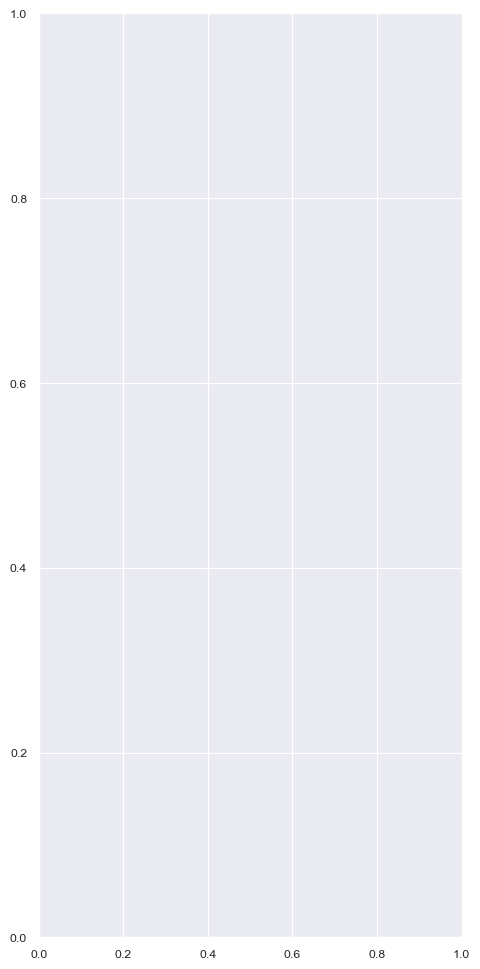

In [38]:

# Plot heatmap of average departure delays for top 50 airports
sns.set(context="paper")
fig = plt.figure(1, figsize=(12,12))

ax = fig.add_subplot(1,2,1)
subset = airport_mean_delays.iloc[:50]
mask = subset.isnull()
sns.heatmap(subset.to_frame(), linewidths=0.05, cmap="YlGnBu", mask=mask, vmin = 0, vmax = 30, annot=True, fmt=".1f", cbar_kws={"label": "Average Departure Delay (in minutes)"})
plt.setp(ax.get_xticklabels(), fontsize=12, rotation = 88) ;
ax.yaxis.label.set_visible(False)

# Plot heatmap of average departure delays for next 50 airports
ax = fig.add_subplot(1,2,2)    
subset = airport_mean_delays.iloc[50:100]
fig.text(0.5, 1.02, "Scale of Delays from Origin Airport", ha='center', fontsize = 20)
mask = subset.isnull()
sns.heatmap(subset.to_frame(), linewidths=0.05, cmap="YlGnBu", mask=mask, vmin = 0, vmax = 30, annot=True, fmt=".1f", cbar_kws={"label": "Average Departure Delay (in minutes)"})
plt.setp(ax.get_xticklabels(), fontsize=12, rotation = 88) ;
ax.yaxis.label.set_visible(False)

plt.tight_layout()
plt.show()

In [27]:
# # Define a function to identify the airport by its code
# def identify_airport(row):
#     airport = airport_data[airport_data['iata_code'] == row]['name']
#     return airport.values[0] if not airport.empty else row

# # Define a dictionary to map airline codes to their names
# abbr_companies = flights_data[['OP_CARRIER', 'OP_CARRIER']].drop_duplicates().set_index('OP_CARRIER')['OP_CARRIER'].to_dict()

# # Compute the average departure delay by origin airport
# airport_mean_delays = flights_data[['ORIGIN', 'DEP_DELAY']].groupby('ORIGIN').mean()

# # Replace the airport codes with their names
# airport_mean_delays.index = airport_mean_delays.index.map(identify_airport)

# # Create the heatmap
# sns.set(context="paper")
# fig = plt.figure(1, figsize=(12,12))

# ax = fig.add_subplot(1,2,1)
# subset = airport_mean_delays.iloc[:50,:]
# mask = subset.isnull()
# sns.heatmap(subset, linewidths=0.05, cmap="YlGnBu", mask=mask, vmin = 0, vmax = 30)
# plt.setp(ax.get_xticklabels(), fontsize=12, rotation = 88)
# ax.yaxis.label.set_visible(False)
# ax.set_title('Scale of Delays from Origin Airport (Top 50)')

# ax = fig.add_subplot(1,2,2)
# subset = airport_mean_delays.iloc[50:100,:]
# mask = subset.isnull()
# sns.heatmap(subset, linewidths=0.05, cmap="YlGnBu", mask=mask, vmin = 0, vmax = 30)
# plt.setp(ax.get_xticklabels(), fontsize=12, rotation = 88)
# ax.yaxis.label.set_visible(False)
# ax.set_title('Scale of Delays from Origin Airport (50-100)')

# plt.tight_layout()
# plt.show()


KeyError: 'OP_CARRIER'

NameError: name 'flights_data' is not defined

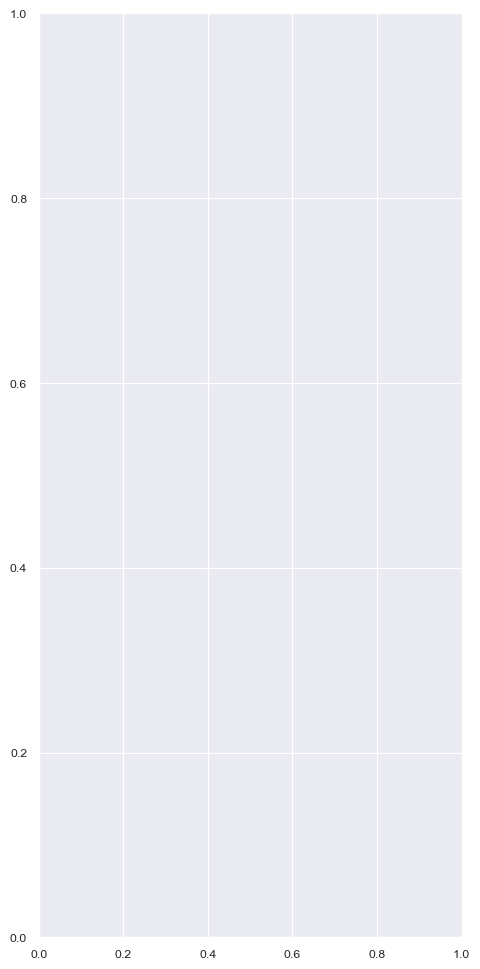

In [ ]:
sns.set(context="paper")
fig = plt.figure(1, figsize=(12,12))

# Heatmap of delays from top 50 origin airports
ax = fig.add_subplot(1,2,1)
subset = flights_data.groupby('ORIGIN')['DEP_DELAY'].mean().sort_values(ascending=False)[:50]
subset = pd.DataFrame(subset.values, index=subset.index, columns=['Average Delay (mins)'])
subset = subset.merge(airports_data[['id', 'latitude_deg', 'longitude_deg']], left_index=True, right_on='id')
subset = subset[['Average Delay (mins)', 'latitude_deg', 'longitude_deg']].dropna()
mask = subset.isnull()
sns.heatmap(subset[['Average Delay (mins)', 'latitude_deg', 'longitude_deg']].corr(), annot=True, cmap="YlGnBu", mask=mask, vmin = 0, vmax = 1, fmt=".2f", annot_kws={'size': 12})
plt.setp(ax.get_xticklabels(), fontsize=12, rotation = 88)
plt.title('Scale of Delays from Top 50 Origin Airports', fontsize=20)
ax.set_xlabel('Latitude')
ax.set_ylabel('Longitude')

plt.tight_layout()


In [ ]:
# Load the dataset
df = pd.read_csv("../data/csv/2009.csv")

# Group the data by the origin airport and calculate the mean delay time
delay_by_origin = df.groupby("ORIGIN")["DEP_DELAY"].mean()

# Create a pivot table with origin airports as rows, destination airports as columns, and delay time as values
pivot_table = pd.pivot_table(df, values="DEP_DELAY", index="ORIGIN", columns="DEST", aggfunc="mean")

# Create a heatmap using seaborn
sns.heatmap(pivot_table, cmap="YlGnBu")


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("../data/csv/2009.csv")

# Group the data by the origin airport and calculate the mean delay time
delay_by_origin = df.groupby("ORIGIN")["DEP_DELAY"].mean()

# Create a pivot table with origin airports as rows, destination airports as columns, and delay time as values
pivot_table = pd.pivot_table(df, values="DEP_DELAY", index="ORIGIN", columns="DEST", aggfunc="mean")

# Rename the airlines with their respective abbreviations
abbr_companies = {
    '9E':'Endeavor Air',
    'AA':'American Airlines',
    'AS':'Alaska Airlines',
    'B6':'JetBlue Airways',
    'DL':'Delta Air Lines',
    'EV':'ExpressJet Airlines',
    'F9':'Frontier Airlines',
    'G4':'Allegiant Air',
    'HA':'Hawaiian Airlines',
    'MQ':'Envoy Air',
    'NK':'Spirit Airlines',
    'OH':'PSA Airlines',
    'OO':'SkyWest Airlines',
    'UA':'United Airlines',
    'WN':'Southwest Airlines',
    'YV':'Mesa Airlines',
    'YX':'Republic Airways'
}

# Rename the airport codes with their full names
def identify_airport(code):
    airports = pd.read_csv("../data/us-airports.csv")
    airport = airports[airports['ident'] == code]['name']
    return airport

# Set the context for the plot
sns.set(context="paper")

# Create the figure
fig = plt.figure(figsize=(12,12))

# Create the first subplot for the top 50 origin airports
ax1 = fig.add_subplot(1,2,1)
subset1 = pivot_table.iloc[:50,:].rename(columns=abbr_companies)
subset1 = subset1.rename(index=identify_airport)
mask1 = subset1.isnull()
sns.heatmap(subset1, linewidths=0.05, cmap="YlGnBu", mask=mask1, vmin=0, vmax=30)
plt.setp(ax1.get_xticklabels(), fontsize=12, rotation=88)
ax1.yaxis.label.set_visible(False)
ax1.set_title('Scale of Delays from Origin Airport (Top 50)')

# Create the second subplot for the next 50 origin airports
ax2 = fig.add_subplot(1,2,2)
subset2 = pivot_table.iloc[50:100,:].rename(columns=abbr_companies)
subset2 = subset2.rename(index=identify_airport)
mask2 = subset2.isnull()
sns.heatmap(subset2, linewidths=0.05, cmap="YlGnBu", mask=mask2, vmin=0, vmax=30)
plt.setp(ax2.get_xticklabels(), fontsize=12, rotation=88)
ax2.yaxis.label.set_visible(False)
ax2.set_title('Scale of Delays from Origin Airport (Next 50)')

# Add the title to the figure
fig.suptitle('Airline Delays in the United States', fontsize=20)

# Adjust the layout of the subplots
plt.tight_layout()


In [ ]:
df = pd.read_csv('../data/csv/2009.csv')

In [ ]:
df.head()

In [ ]:
print(df.duplicated().sum())


In [ ]:
%%timeit
# df['FL_DATE'] = pd.to_datetime(df['FL_DATE'])
df['FL_DATE'] = df['FL_DATE'].apply(pd.Timestamp)
df['ORIGIN'] = df['ORIGIN'].apply(str)
df['TAXI_OUT'] = df['TAXI_OUT'].apply(float)

In [ ]:
%%timeit
# Use pd.to_datetime, pd.to_numeric
df['FL_DATE'] = pd.to_datetime(df['FL_DATE'])
df['TAXI_OUT'] = pd.to_numeric(df['TAXI_OUT'])

In [ ]:
%%timeit
# Use astype()
df['FL_DATE'] = df['FL_DATE'].astype('datetime64[ns]')
df['ORIGIN'] = df['ORIGIN'].astype('str')
df['TAXI_OUT'] = df['TAXI_OUT'].astype('float')

In [ ]:
#Index(['FL_DATE', 'OP_CARRIER', 'OP_CARRIER_FL_NUM', 'ORIGIN', 'DEST',
    #    'CRS_DEP_TIME', 'DEP_TIME', 'DEP_DELAY', 'TAXI_OUT', 'WHEELS_OFF',
    #    'WHEELS_ON', 'TAXI_IN', 'CRS_ARR_TIME', 'ARR_TIME', 'ARR_DELAY',
    #    'CANCELLED', 'CANCELLATION_CODE', 'DIVERTED', 'CRS_ELAPSED_TIME',
    #    'ACTUAL_ELAPSED_TIME', 'AIR_TIME', 'DISTANCE', 'CARRIER_DELAY',
    #    'WEATHER_DELAY', 'NAS_DELAY', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY',
    #    'Unnamed: 27'],
    #   dtype='object')

In [ ]:
nas_delay_values = df.loc[~df['WEATHER_DELAY'].isnull() & df['WEATHER_DELAY'] != False, 'WEATHER_DELAY']
print(nas_delay_values)
# cancel_code = df['CANCELLATION_CODE']
df['WEATHER_DELAY'].unique()

In [ ]:
nas_delay_values = df.loc[~df['Unnamed: 27'].isnull() & df['Unnamed: 27'] != False, 'Unnamed: 27']
print(nas_delay_values)
# cancel_code = df['CANCELLATION_CODE']
df['Unnamed: 27'].unique()

In [ ]:
nas_delay_values = df.loc[~df['CANCELLED'].isnull() & df['CANCELLED'] != False, 'CANCELLED']
print(nas_delay_values)
# cancel_code = df['CANCELLATION_CODE']
df['CANCELLED'].unique()

In [ ]:
nas_delay_values = df.loc[~df['CANCELLATION_CODE'].isnull() & df['CANCELLATION_CODE'] != False, 'CANCELLATION_CODE']
print(nas_delay_values)
# cancel_code = df['CANCELLATION_CODE']
df['CANCELLATION_CODE'].unique()

In [ ]:
nas_delay_count = df['NAS_DELAY'].sum()
nas_delay_nan_count = df['NAS_DELAY'].isna().sum()

print("Number of NaN values in NAS_DELAY column:", nas_delay_nan_count)

In [ ]:
df.columns

In [ ]:
df.info()

In [ ]:
df.describe

In [20]:
airports_data = pd.read_csv('../data/us-airports.csv')
clean_airports= airports_data[1:]

In [21]:
clean_airports.columns

Index(['id', 'ident', 'type', 'name', 'latitude_deg', 'longitude_deg',
       'elevation_ft', 'continent', 'country_name', 'iso_country',
       'region_name', 'iso_region', 'local_region', 'municipality',
       'scheduled_service', 'gps_code', 'iata_code', 'local_code', 'home_link',
       'wikipedia_link', 'keywords', 'score', 'last_updated'],
      dtype='object')

In [ ]:
clean_airports.head()